In [26]:
import sys
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [27]:
csvs = ['data/c_data.csv','data/javascript_data.csv','data/python_data.csv','data/java_sorts.csv']
# Create an empty list to store DataFrames
dfs = []

# Loop through each file path and read the CSV into a DataFrame
for file_path in csvs:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate the DataFrames horizontally along the columns axis
result_df = pd.concat(dfs, axis=1)

# Display the resulting DataFrame
# print(result_df)
result_df

,c_builtin,c_builtin_greaterthan,c_quicksort,javascript_builtin,javascript_mergesort,javascript_quicksort,python_builtin,numpyBuiltin,implementedQuicksort,java_dualqsort,implementedQuicksort
0,22,4,0,122.6168,209.2079,214.2468,22.815918,2.479736,1799.985107,145,143
1,22,4,13,123.1234,198.5052,217.2739,21.823730,2.480469,1767.744141,101,91
2,21,5,14,122.1599,209.8819,222.9777,21.824463,2.480225,1760.800537,123,90
3,22,4,13,118.9367,187.3528,235.8563,22.319824,2.975830,1822.800537,111,109
4,21,4,12,120.0640,191.8890,235.0964,21.824219,2.975830,1838.672607,129,104
...,...,...,...,...,...,...,...,...,...,...,...
195,21,4,13,119.9861,195.8619,84.8008,20.332520,2.484863,1729.521484,109,124
196,21,4,13,120.4748,190.5272,90.4452,22.321045,2.975586,1764.769043,110,141
197,21,3,13,120.0901,194.0920,100.3628,22.318848,2.480225,1828.752930,98,95
198,22,4,13,117.6242,213.8328,114.7356,21.823486,2.976074,1789.566895,108,127


In [28]:
cols = []
count = 0
for column in result_df.columns:
    if column == 'implementedQuicksort':
        if(count == 0):
            cols.append('python_quicksort')
        else:
            cols.append('java_quicksort')
        count+=1
        continue
    cols.append(column)
result_df.columns = cols
result_df = result_df.rename(columns={"numpyBuiltin": "numpy_builtin", "java_dualqsort": "java_builtin_dualqsort"})

result_df

,c_builtin,c_builtin_greaterthan,c_quicksort,javascript_builtin,javascript_mergesort,javascript_quicksort,python_builtin,numpy_builtin,python_quicksort,java_builtin_dualqsort,java_quicksort
0,22,4,0,122.6168,209.2079,214.2468,22.815918,2.479736,1799.985107,145,143
1,22,4,13,123.1234,198.5052,217.2739,21.823730,2.480469,1767.744141,101,91
2,21,5,14,122.1599,209.8819,222.9777,21.824463,2.480225,1760.800537,123,90
3,22,4,13,118.9367,187.3528,235.8563,22.319824,2.975830,1822.800537,111,109
4,21,4,12,120.0640,191.8890,235.0964,21.824219,2.975830,1838.672607,129,104
...,...,...,...,...,...,...,...,...,...,...,...
195,21,4,13,119.9861,195.8619,84.8008,20.332520,2.484863,1729.521484,109,124
196,21,4,13,120.4748,190.5272,90.4452,22.321045,2.975586,1764.769043,110,141
197,21,3,13,120.0901,194.0920,100.3628,22.318848,2.480225,1828.752930,98,95
198,22,4,13,117.6242,213.8328,114.7356,21.823486,2.976074,1789.566895,108,127


In [29]:
# Create a long-form DataFrame suitable for Tukey's test
long_form_df = result_df.melt(var_name='Algorithm', value_name='Speed (ms)')

# Perform Tukey's test
tukey_result = pairwise_tukeyhsd(long_form_df['Speed (ms)'], long_form_df['Algorithm'])

# Print the Tukey test results
print(tukey_result)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                 group2          meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------------------
  javascript_mergesort   javascript_quicksort  -99.8653    0.0 -104.8943  -94.8362   True
  javascript_mergesort              c_builtin -174.8859    0.0  -179.915 -169.8569   True
  javascript_mergesort  c_builtin_greaterthan -192.0759    0.0  -197.105 -187.0469   True
  javascript_mergesort            c_quicksort -183.5959    0.0  -188.625 -178.5669   True
  javascript_mergesort java_builtin_dualqsort  -87.7959    0.0   -92.825  -82.7669   True
  javascript_mergesort         java_quicksort  -93.5809    0.0    -98.61  -88.5519   True
  javascript_mergesort     javascript_builtin  -74.7004    0.0  -79.7294  -69.6713   True
  javascript_mergesort          numpy_builtin -193.6341    0.0 -198.6632 -188.6051   True
  javascri

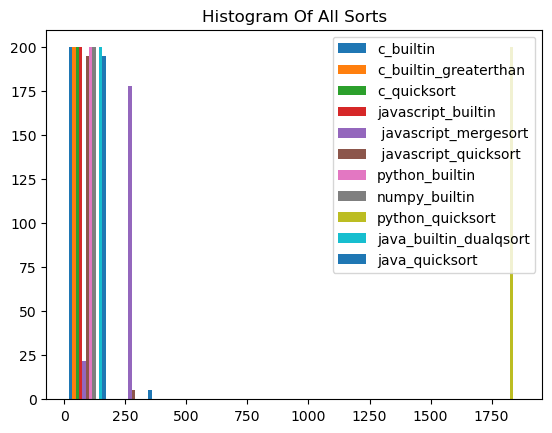

In [46]:
fig, ax = plt.subplots(1, 1)
plt.title('Histogram Of All Sorts')
ax.hist(result_df)
ax.legend((result_df.columns),loc='upper right')
plt.show()

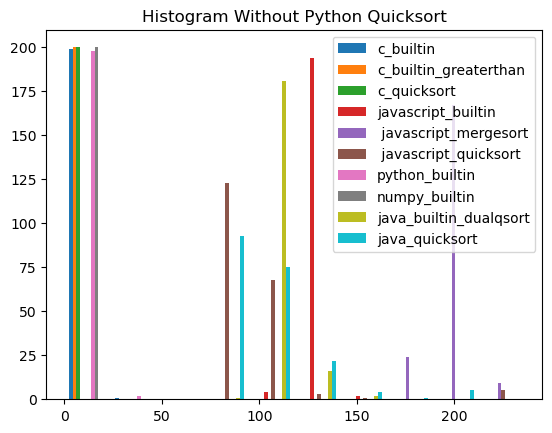

In [45]:
dfWithoutPythonQS = result_df.drop(columns="python_quicksort")

fig, ax = plt.subplots(1, 1)
plt.title('Histogram Without Python Quicksort')
ax.hist(dfWithoutPythonQS)
ax.legend((dfWithoutPythonQS.columns),loc='upper right')
plt.show()

In [40]:
description = result_df.describe()
description.sort_values(by = "mean", axis = 1)

,numpy_builtin,c_builtin_greaterthan,c_quicksort,c_builtin,python_builtin,javascript_quicksort,java_quicksort,java_builtin_dualqsort,javascript_builtin,javascript_mergesort,python_quicksort
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.531771,4.090000,12.570000,21.280000,22.051829,96.300634,102.585000,108.370000,121.465531,196.165908,1782.947487
std,0.342268,0.513046,1.175589,0.833712,0.703455,22.479888,21.654964,7.169386,3.204139,7.808411,39.747365
min,1.975342,3.000000,0.000000,19.000000,20.332520,79.216100,83.000000,94.000000,117.373900,182.506800,1700.784180
25%,2.479492,4.000000,12.000000,21.000000,21.819763,87.857700,91.000000,104.000000,120.055725,191.350425,1751.230103
50%,2.479980,4.000000,13.000000,21.000000,21.824463,91.942550,95.000000,107.000000,121.004650,194.203800,1777.168579
75%,2.480469,4.000000,13.000000,22.000000,22.320129,97.584325,105.000000,112.000000,122.312100,199.159550,1811.150208
max,4.959229,6.000000,16.000000,27.000000,27.250244,235.856300,210.000000,151.000000,152.217700,235.514800,1884.304443


Looking at this we get the order from fastest (numpy_builtin, c_builtin_greaterthan), c_quicksort, (c_builtin, python_builtin), javascript_quicksort, java_quicksort, java_builtin_dualqsort, javascript_builtin, javascript_mergesort, python_quicksort